<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

Training set: (48000, 28, 28), (48000,)
Validation set: (12000, 28, 28), (12000,)
Test set: (10000, 28, 28), (10000,)


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.05530435, 0.10899866, 0.06259409, 0.08033098, 0.16927093,
        0.06369355, 0.20416042, 0.11901479, 0.05913225, 0.07749998]],
      dtype=float32)

In [ ]:
#tf.nn.softmax(predictions).numpy()

array([[0.08408269, 0.06544694, 0.07365703, 0.15335064, 0.12709115,
        0.10679632, 0.085416  , 0.0692711 , 0.0467931 , 0.188095  ]],
      dtype=float32)

In [18]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn(y_train[:1], predictions).numpy()
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_valid, y_valid))


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 27.2608 - accuracy: 0.1029 - val_loss: 27.4796 - val_accuracy: 0.0981
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 27.2608 - accuracy: 0.0976 - val_loss: 27.4796 - val_accuracy: 0.0978
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 27.2608 - accuracy: 0.0977 - val_loss: 27.4796 - val_accuracy: 0.0979
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 27.2608 - accuracy: 0.1011 - val_loss: 27.4796 - val_accuracy: 0.1082
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 27.2608 - accuracy: 0.0984 - val_loss: 27.4796 - val_accuracy: 0.0920
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 27.2608 - accuracy: 0.0997 - val_loss: 27.4796 - val_accuracy: 0.0978
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 27.2608 - accuracy: 0.1008 - val_loss: 27.4796 -

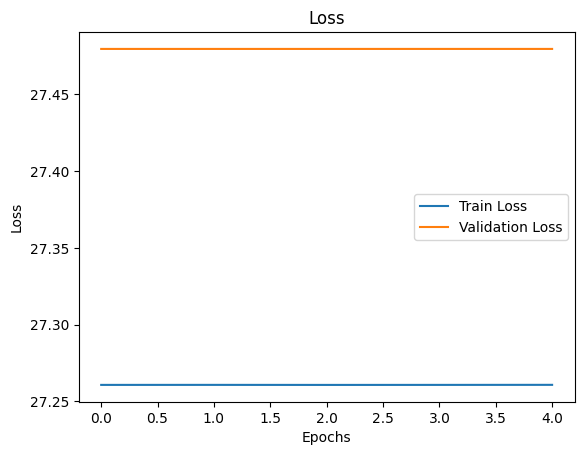

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0949 - accuracy: 0.9756 - 655ms/epoch - 2ms/step


[0.09490399062633514, 0.975600004196167]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.7214460e-09, 7.6927416e-11, 1.0732803e-05, 1.0105013e-05,
        2.2069718e-12, 3.9153988e-08, 3.5882742e-15, 9.9997675e-01,
        4.5757929e-08, 2.2919071e-06],
       [8.5240544e-07, 5.5836822e-04, 9.9940407e-01, 2.5547057e-05,
        8.4299959e-16, 1.0671995e-05, 2.2211642e-08, 6.8177174e-14,
        4.2966900e-07, 3.9095338e-14],
       [6.8845492e-07, 9.9816018e-01, 1.3507655e-04, 6.3714499e-05,
        1.5371968e-05, 2.3644636e-05, 3.5243224e-06, 1.4324242e-03,
        1.5368078e-04, 1.1641400e-05],
       [9.9989009e-01, 2.0718325e-09, 3.9241073e-05, 5.9412411e-08,
        8.1380023e-08, 1.6833837e-06, 3.7095542e-06, 9.6668837e-06,
        4.3344990e-09, 5.5430901e-05],
       [8.0219543e-06, 3.3126542e-09, 1.9479094e-06, 1.5980834e-07,
        9.9481440e-01, 7.1228201e-06, 8.3044442e-06, 3.7509304e-05,
        2.3482430e-06, 5.1202597e-03]], dtype=float32)>